# Importing Packages

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as SS
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix as cm
from matplotlib.colors import ListedColormap as LC

# Data Pre-Processing

In [19]:
dataset = pd.read_csv("/kaggle/input/bank-dataset/UniversalBank.csv")
x = dataset.iloc[ : , 1 : 13 ].values
y = dataset['CreditCard'].values

df = pd.DataFrame(dataset)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [20]:
# Train - Test Split
x_train , x_test , y_train , y_test = tts( x , y , test_size = 0.4 , random_state = 40 )

# Feature Scaling
st_x = SS()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

df = pd.DataFrame(x_test)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.418762,-1.833439,-0.083979,0.693080,-0.371365,-0.128544,1.328466,-0.551928,-0.33825,-0.335797,-0.245856,-1.223045
1,1.712779,1.734692,-0.126818,-0.640407,1.380356,-1.045257,0.138440,-0.551928,-0.33825,-0.335797,-0.245856,0.817631
2,-0.983826,-0.963163,-0.319593,0.400531,0.504496,0.177028,-1.051587,-0.551928,-0.33825,-0.335797,-0.245856,-1.223045
3,-1.331775,-1.224246,0.151636,0.200185,-0.371365,0.288144,-1.051587,-0.551928,-0.33825,-0.335797,-0.245856,-1.223045
4,-0.113953,-0.005860,2.100807,-1.256094,-0.371365,-0.322998,-1.051587,3.669183,-0.33825,-0.335797,-0.245856,0.817631
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.809851,-0.789108,1.865193,0.599154,-1.247225,3.677207,-1.051587,0.989432,-0.33825,2.977989,-0.245856,0.817631
1996,-0.896839,-1.050191,-0.490948,1.044224,-0.371365,-0.545232,0.138440,-0.551928,-0.33825,-0.335797,-0.245856,-1.223045
1997,-0.374915,-0.353970,0.515766,-0.229374,-1.247225,-0.545232,1.328466,-0.551928,-0.33825,-0.335797,-0.245856,0.817631
1998,-1.331775,-1.311274,-1.133532,-1.350450,1.380356,-0.823024,1.328466,0.546165,-0.33825,-0.335797,-0.245856,0.817631


# Model Building

In [21]:
classifier = SVC (kernel = 'linear' , random_state = 0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [22]:
#Predicting the test set result
y_pred= classifier.predict(x_test)
df = pd.DataFrame(y_pred)
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
1995,0
1996,0
1997,0
1998,0


In [23]:
#Creating the Confusion matrix

cm = cm(y_test,y_pred)
print(cm)

[[1390   22]
 [ 479  109]]


# Visualization of Training Set

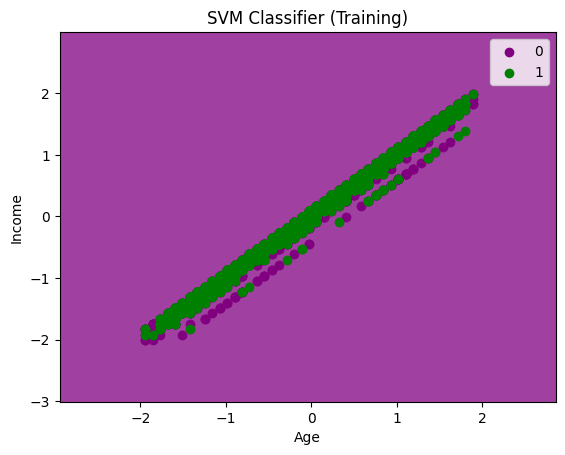

In [24]:
# Generating mesh grid using all 12 features
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Creating mesh grid using all 12 features
X_mesh = np.c_[xx.ravel(), yy.ravel(), np.ones_like(xx.ravel()), np.ones_like(xx.ravel()), np.ones_like(xx.ravel()),
               np.ones_like(xx.ravel()), np.ones_like(xx.ravel()), np.ones_like(xx.ravel()), np.ones_like(xx.ravel()),
               np.ones_like(xx.ravel()), np.ones_like(xx.ravel()), np.ones_like(xx.ravel())]

# Predicting using the mesh grid data with all 12 features
Z = classifier.predict(X_mesh)
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.contourf(xx, yy, Z, alpha=0.75, cmap=LC(('purple', 'green')))

# Plotting the data points
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(x_train[y_train == j, 0], x_train[y_train == j, 1],
                color=LC(('purple', 'green'))(i), label=j)

plt.xlabel('Age')
plt.ylabel('Income')
plt.title('SVM Classifier (Training)')
plt.legend()
plt.show()

# Visualization of Testing Set

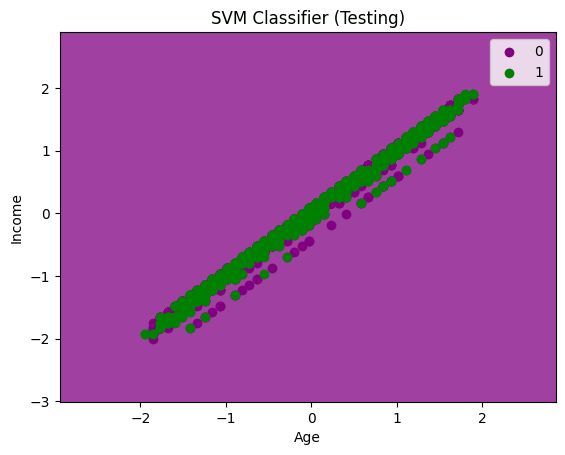

In [25]:
# Generating mesh grid using all 12 features
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Creating mesh grid using all 12 features
X_mesh = np.c_[xx.ravel(), yy.ravel(), np.ones_like(xx.ravel()), np.ones_like(xx.ravel()), np.ones_like(xx.ravel()),
               np.ones_like(xx.ravel()), np.ones_like(xx.ravel()), np.ones_like(xx.ravel()), np.ones_like(xx.ravel()),
               np.ones_like(xx.ravel()), np.ones_like(xx.ravel()), np.ones_like(xx.ravel())]

# Predicting using the mesh grid data with all 12 features
Z = classifier.predict(X_mesh)
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.contourf(xx, yy, Z, alpha=0.75, cmap=LC(('purple', 'green')))

# Plotting the data points
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(x_test[y_test == j, 0], x_test[y_test == j, 1],
                color=LC(('purple', 'green'))(i), label=j)

plt.xlabel('Age')
plt.ylabel('Income')
plt.title('SVM Classifier (Testing)')
plt.legend()
plt.show()